In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. K-means (K-평균)
- **거리 기반** 군집화

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


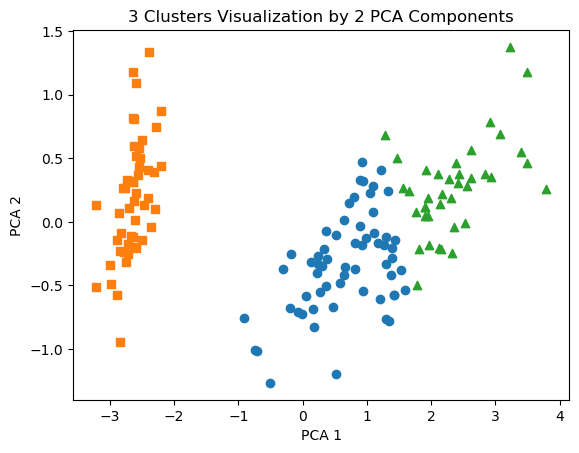

In [4]:
iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head(3)

# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(iris_df)

# iris_df['cluster']=kmeans.labels_ 개정 소스코드 변경(2019.12.24)
iris_df['target'] = iris.target
iris_df['cluster']=kmeans.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# iris 4개의 속성을 2차원 평면에 그리기 위해 PCA로 2개로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=iris_df.loc[marker0_ind,'pca_x'], y=iris_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=iris_df.loc[marker1_ind,'pca_x'], y=iris_df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[marker2_ind,'pca_x'], y=iris_df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 군집화 알고리즘을 테스트하기 위한 데이터 생성

### 대표적 군집화 알고리즘 생성기



#### make_classification()
- 노이즈를 포함한 데이터를 만든다.

#### make_plobs()
- 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있다.
- 피처 데이터 세트, 타깃 데이터 세트가 튜플로 잔환 

- make_blobs(n_samples, n_features, centers, cluster_std)
    - n_samples(default:100): 생성할 데이터 개수
    - n_features: 데이터 피쳐 개수
    - centers: int값으로 입력 - 군집개수 / ndarray로 입력 - 개별 군집 중심점의 좌표
    - cluster_std: 생성될 군집 데이터의 표준편차

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

(200, 2) (200,)
[0 1 2] [67 67 66]


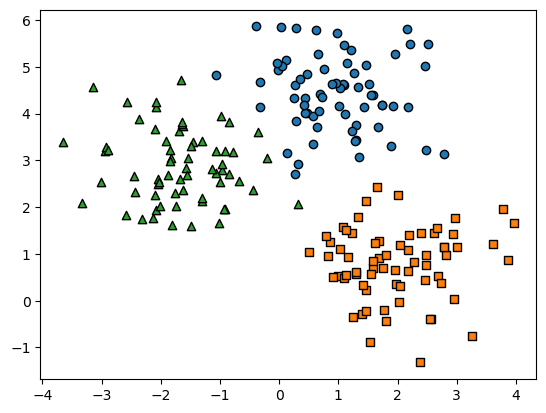

In [49]:
# 테스트 데이터 생성
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

# DataFrame에 적용
import pandas as pd
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )

plt.show()

In [50]:
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


## KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 후 시각화

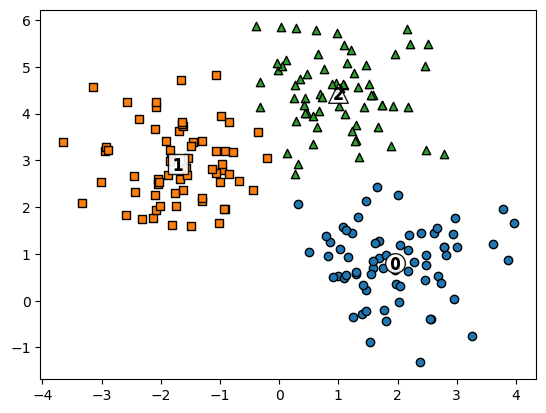

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [51]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

print(cluster_df.groupby('target')['kmeans_label'].value_counts())

- 0 은 2로
- 1은 0으로
- 2는 1로 

# 2. Cluster Evaluation (군집 평가)

## 실루엣 분석
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타냄

In [53]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

iris_df['cluster'] = kmeans.labels_

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)
print(np.mean(silhouette_samples(iris.data, iris_df['cluster'])))
print(silhouette_score(iris.data, iris_df['cluster']))

# iris_df 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, iris_df['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# 군집별 평균 실루엣 계수
print(iris_df.groupby('cluster')['silhouette_coeff'].mean())

silhouette_samples( ) return 값의 shape (150,)
0.5511916046195919
0.5511916046195919
붓꽃 데이터셋 Silhouette Analysis Score:0.551
cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64


In [56]:
iris_df.shape

(150, 6)

In [55]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


## 군집 평균 실루엣 계수 시각화를 통한 군집 개수 최적화

- **좋은 군집의 조건**

    - 전체 실루엣 계수의 평균값(silhouette_score())은 0~1 사이의 값을 가지며, 1에 가까울 수록 좋다.
      
    - 하지만 전체 실루엣 계수의 평균값과 더불어, 개별 군집의 평균값의 편차가 크지 않아야 한다.

    - 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수 평균값에서 크게 벗어나지 않는 것이 중요하다.

In [57]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 10), nrows=2, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        centers = clusterer.cluster_centers_
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[0,ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[0,ind].set_xlabel("The silhouette coefficient values")
        axs[0,ind].set_ylabel("Cluster label")
        axs[0,ind].set_xlim([-0.1, 1])
        axs[0,ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[0,ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[0,ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[0,ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[0,ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

            # 클러스터링된 데이터 시각화
            axs[1,ind].scatter(X_features[:, 0], X_features[:, 1], marker='.', s=30, lw=0, alpha=0.7, \
                c=cluster_labels)
            axs[1,ind].set_title("Clustered data")
            axs[1,ind].set_xlabel("Feature space for the 1st feature")
            axs[1,ind].set_ylabel("Feature space for the 2nd feature")  

        # 군집별 중심 위치 좌표 시각화 
        unique_labels = np.unique(cluster_labels)
        for label in unique_labels:
            center_x_y = centers[label]
            axs[1,ind].scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                        marker='$%d$' % label)
            
        axs[0,ind].axvline(x=sil_avg, color="red", linestyle="--")

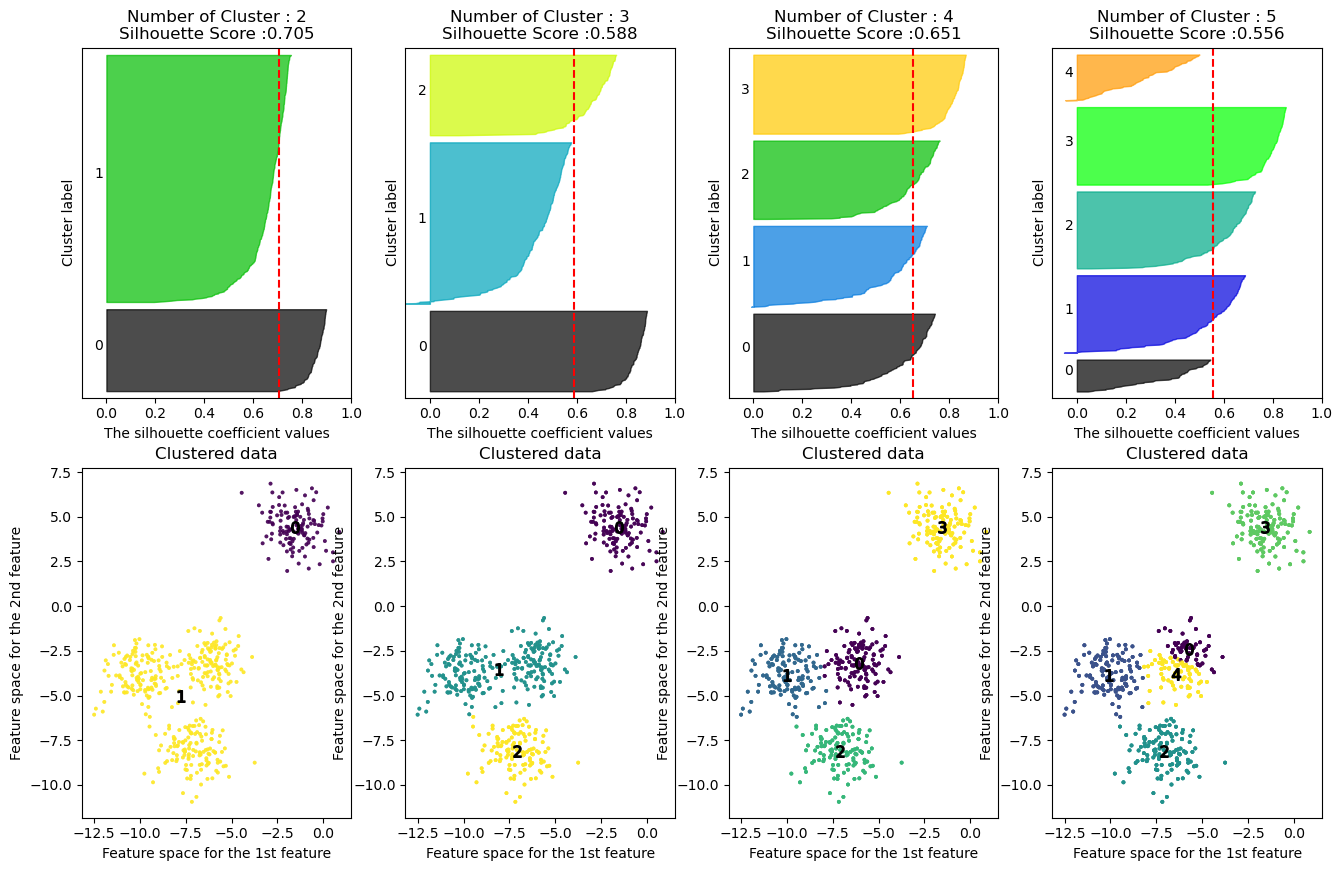

In [61]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], X)

- 4개의 군집에서 최적화

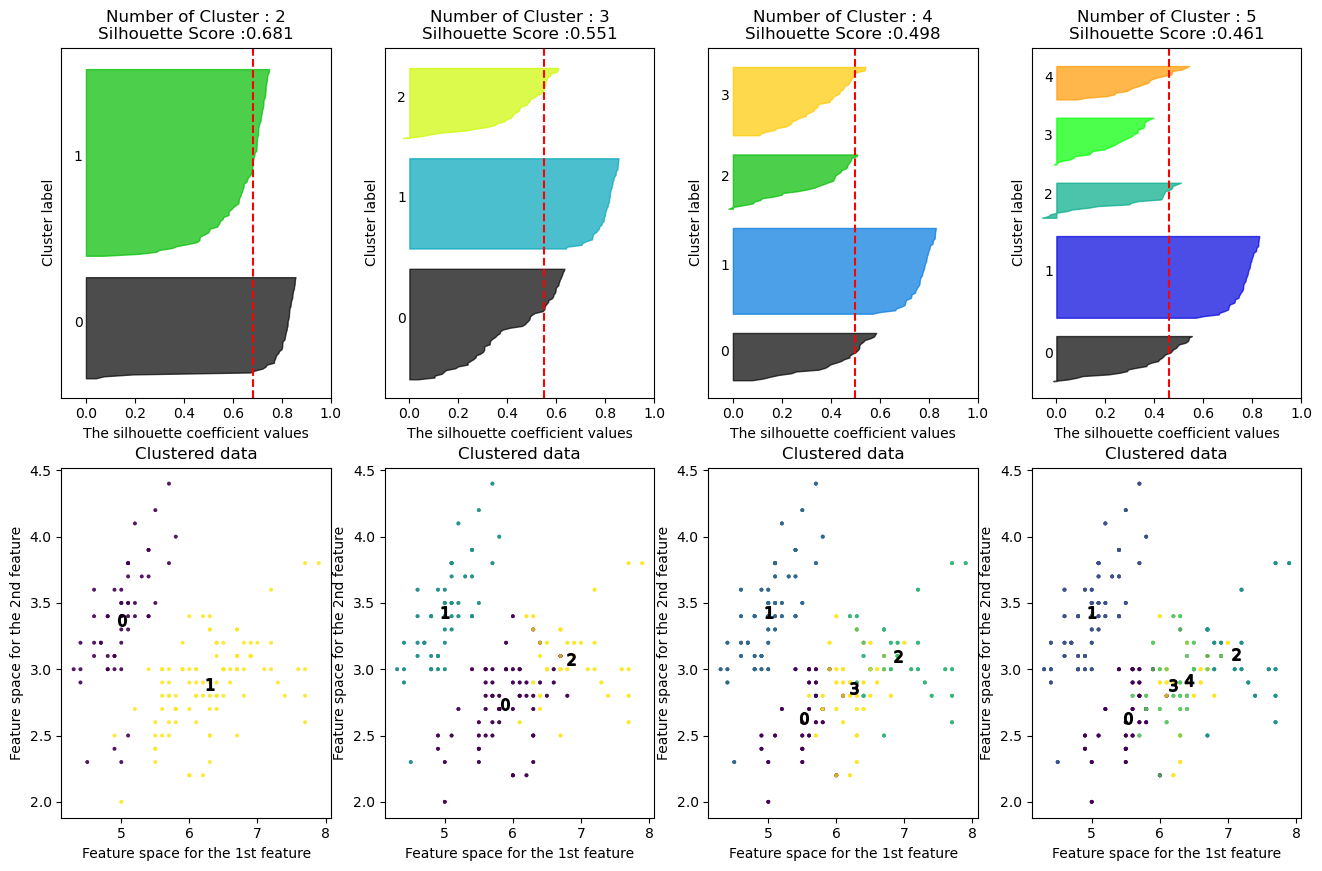

In [60]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)

- 2개의 군집으로 나누는것이 좋아보임
- 3, 4, 5개의 군집으로 나누는 경우
    - 실루엣 계수값이 2보다 작음
    - 1과 0, 2 군집간 실루엣 계수 편차가 큼

# 3. Mean Shift (평균이동)

- 군집의 중신을 지속적으로 움직임 (K-means와 유사)
- 평균 이동은 데이터가 모여있는 밀도가 가장 높은 곳으로 이동 (K-mean와 차이점)

In [70]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)

for i in range(5):  # 0,1,2,3,4
    bandwidth = 0.5 + 0.1 * i
    meanshift= MeanShift(bandwidth=bandwidth) # bandwidth (=KDE의 h) 값을 작게 할수록 군집 개수가 많아진다.
    cluster_labels = meanshift.fit_predict(X)
    print(f'cluster labels 유형(bandwidth = {bandwidth}):', np.unique(cluster_labels))


meanshift= MeanShift(bandwidth=1) # bandwidth 변경
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))


cluster labels 유형(bandwidth = 0.5): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
cluster labels 유형(bandwidth = 0.6): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
cluster labels 유형(bandwidth = 0.7): [0 1 2 3 4 5 6 7 8]
cluster labels 유형(bandwidth = 0.8): [0 1 2 3 4 5]
cluster labels 유형(bandwidth = 0.9): [0 1 2]
cluster labels 유형: [0 1 2]


## 최적의 대역폭 찾기
- estimate_bandwidth()

In [74]:
from sklearn.cluster import estimate_bandwidth
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

bandwidth 값: 1.816
cluster labels 유형: [0 1 2]


### 최적의 대역폭적용 군집 시각화

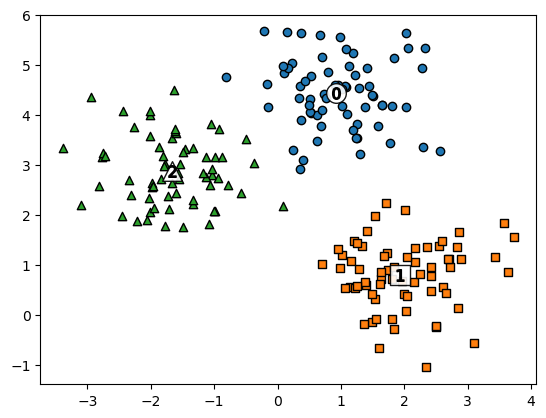

In [80]:
import matplotlib.pylab as plt

cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_

unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
    center_x_y = centers[label]

    # 군집별로 다른 마커
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [82]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


# 4. Gaussian Mixture Model (GMM)
- **확률 기반** 군집화
- 군집화를 적용하고자 하는 데이터가, 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에, 군집화를 수행하는 방식

- GaussianMixture(n_components=3, random_state=0)
    - n_components: 가우시안 모델(군집)의 총 개수 (K-means의 n_clusters와 같음)

In [84]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
iris_df['gmm_cluster'] = gmm_cluster_labels
iris_df['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [86]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
iris_df['kmeans_cluster'] = kmeans_cluster_labels
iris_result = iris_df.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


## GMM과 K-means 비교

- K-means
    - 거리기반
    - 원형의 범위
    - 타원형의 경우는 군집화를 잘 수행하지 못함 


In [89]:
# GMM에서 사용한 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+ str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
cluster_df['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_

unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['meanshift_label'] == label]
 ㅇㅇ   center_x_y = centers[label]

    # 군집별로 다른 마커
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)


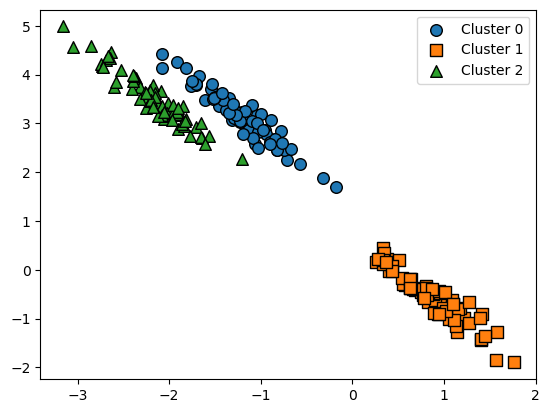

In [92]:
from sklearn.datasets import make_blobs

# 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어진 타원형 데이터 형태로 변환
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# feature 데이트세트와 make_blobs()의 y 결과값을 DataFrame으로 저장
cluster_df = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

# 생성된 데이터세트를 target별로 시각화
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

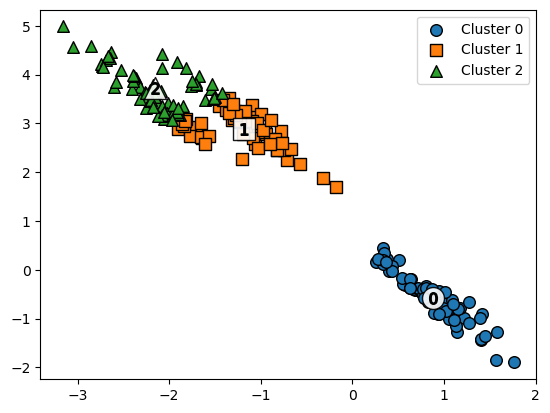

### KMeans Clusterring ###
target  kmeans_label
0       1               50
        2               17
1       0               67
2       2               53
        1               13
Name: count, dtype: int64


In [95]:
# Kmeans를 활용한 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
cluster_df['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label', iscenter=True)

print(f'### KMeans Clusterring ###', cluster_df.groupby('target')['kmeans_label'].value_counts(), sep='\n')

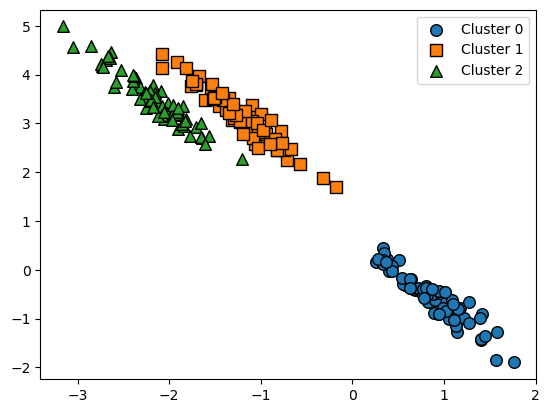

### Gaussian Mixture Clusterring ###
target  gmm_label
0       1            67
1       0            67
2       2            66
Name: count, dtype: int64


In [96]:
# Gmm를 활용한 클러스터링
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
cluster_df['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없음 (iscenter=False)
visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False)

print(f'### Gaussian Mixture Clusterring ###', cluster_df.groupby('target')['gmm_label'].value_counts(), sep='\n')

# DBSCAN (Density Based Spatial Clustering of Applications with Noise, 밀도 기반 군집화)
- 데이터 분포가 기하학적으로 복잡한 데이터 세트에서도 효과적
- 가장 중요한 두 가지 파라미터
    - 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
    - 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터 개수

In [97]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


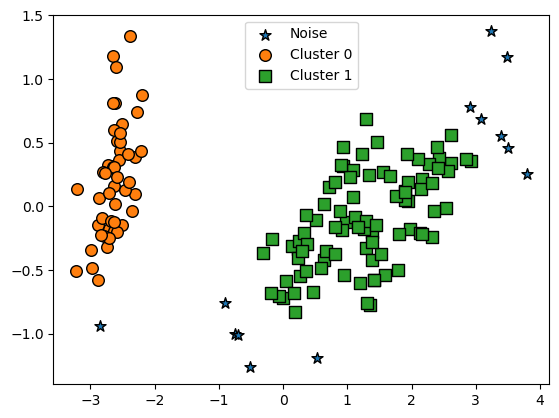

In [98]:
# 2차원으로 시각화
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot() 함수 ftr1, ftr2 컬럼 필요
iris_df['ftr1'] = pca_transformed[:, 0]
iris_df['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


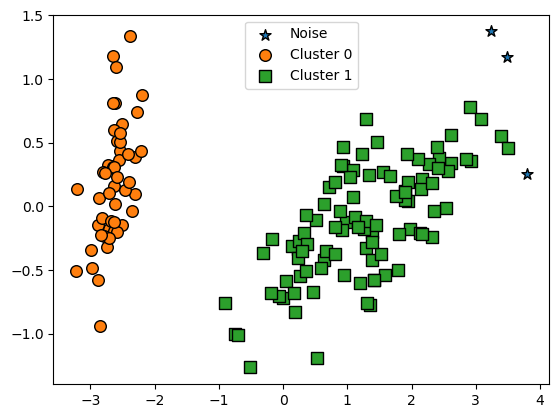

In [99]:
# eps 0.8로 증가
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: count, dtype: int64


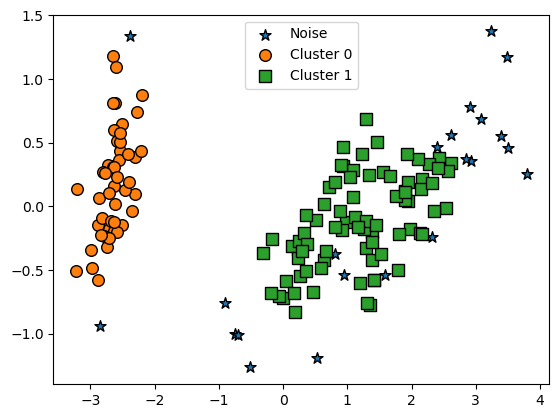

In [100]:
# eps 0.6 유지, min_samples=16으로 증가
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

## DBSCAN 적용 - make_circles() data set

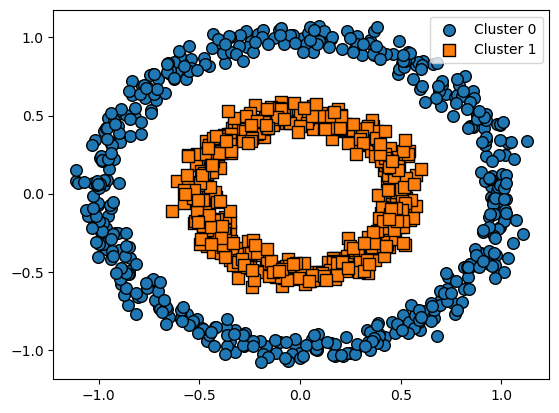

In [107]:
from  sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

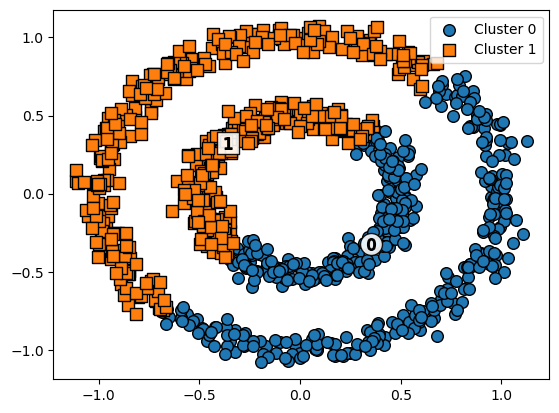

### KMeans Clusterring ###
target  kmeans_cluster
0       1                 251
        0                 249
1       0                 252
        1                 248
Name: count, dtype: int64


In [109]:
# Kmeans를 활용한 클러스터링
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_label = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_label

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)

print(f'### KMeans Clusterring ###', cluster_df.groupby('target')['kmeans_cluster'].value_counts(), sep='\n')

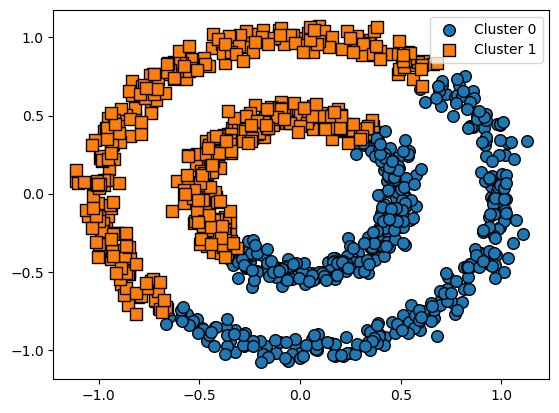

### Gaussian Mixture Clusterring ###
target  gmm_cluster
0       1              252
        0              248
1       0              251
        1              249
Name: count, dtype: int64


In [110]:
# Gmm를 활용한 클러스터링
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
cluster_df['gmm_cluster'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없음 (iscenter=False)
visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

print(f'### Gaussian Mixture Clusterring ###', cluster_df.groupby('target')['gmm_cluster'].value_counts(), sep='\n')

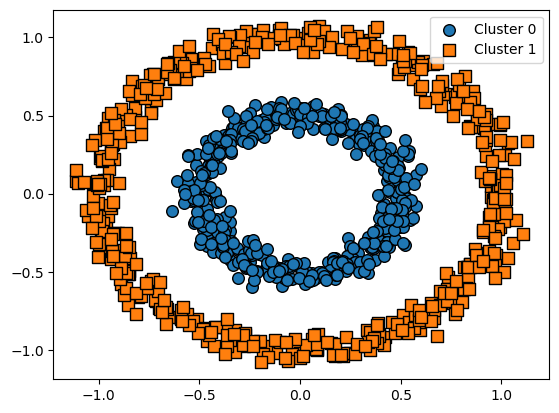

### Gaussian Mixture Clusterring ###
target  dbscan_cluster
0       1                 500
1       0                 500
Name: count, dtype: int64


In [112]:
# eps 0.6 유지, min_samples=16으로 증가
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)

cluster_df['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)

print(f'### Gaussian Mixture Clusterring ###', cluster_df.groupby('target')['dbscan_cluster'].value_counts(), sep='\n')